# Takeoff Distance

Typically, at this stage of design, the $W/S$ and $W/P$ required for a certain takeoff distance is determined using the takeoff parameter (TOP), which is defined as

$$
    \text{TOP} = \frac{ \bigg( \dfrac{W}{S} \bigg)_{TO} \bigg( \dfrac{W}{P} \bigg)_{TO} }{ \sigma C_{L_{max_{TO}}} },
$$

where $\sigma$ is the ratio of the density at the takeoff altitude to the sea-level. Most aircraft design books will provide a relation between $\text{TOP}$ and takeoff ground roll or takeoff distance requried to clear an obstacle based on historical data. 

According to [mission specifications](example_aircraft.md), the example aircraft needs to takeoff within 1500 ft of ground roll. Additionally, it should also be able to climb to a distance of 50' above takeoff surface according to CFR [Part 23.2115](https://www.ecfr.gov/current/title-14/chapter-I/subchapter-C/part-23/subpart-B/subject-group-ECFR0f27e01839859ea/section-23.2115). Schematically, it can be represented as

In this section, the TOP relationship provided in the Section 3.1 of Roskam Part 1 is used, which is given by

$$
    S_{TGR} = 4.9 \text{ } \text{TOP}_{23} + 0.009 \text{ } \text{TOP}_{23}^2,
$$

where $S_{TGR}$ is the required takeoff ground roll and $\text{TOP}_{23}$ denotes TOP for FAR 23 airplanes.

> **_NOTE_:** In the above equation, the $S_{TGR}$ should be in feets, $W/P$ should be in lbs/hp, and $W/S$ should be in lbs/$\text{ft}^2$

The $\text{TOP}_{23}$ can be solved from above quadratic equation and substituted into $\text{TOP}$ equation to obtain

$$
    \frac{ \bigg( \dfrac{W}{S} \bigg)_{TO} \bigg( \dfrac{W}{P} \bigg)_{TO} }{ \sigma C_{L_{max_{TO}}} } \leq \text{TOP}_{23}.
$$

This inequality relation can be used to determine various combinations of $W/S$ and $W/P$ that satisfy the takeoff ground roll requirement for FAR 23 airplanes.

Below code plots the takeoff requirement for the example aircraft and highlights the feasible region:

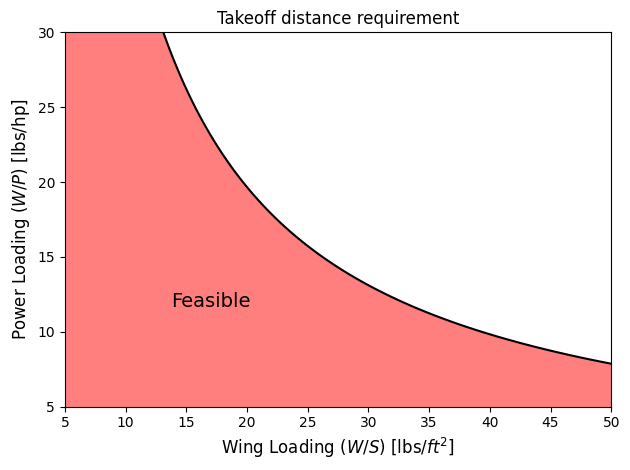

In [10]:
import numpy as np
import matplotlib.pyplot as plt

s_tgr = 1500 # ft
sigma = 1 # since sealevel conditions
CL_max_to = 1.8

# coeff of quadratic eq
a = 0.009
b = 4.9
c = -s_tgr

# TOP solution
top_23 = (-b + np.sqrt(b**2 - 4*a*c)) / 2 / a # other solution will be negative

# W/S amd W/P values
num_pts = 500
wing_loading = np.linspace(5, 50, num_pts) # lb/ft^2
power_loading = np.linspace(5, 30, num_pts) # lb/hp
X, Y = np.meshgrid(wing_loading, power_loading)

takeoff_req = X * Y / sigma / CL_max_to - top_23

# Plotting
fs = 12 # fontsize

fig, ax = plt.subplots()
ax.contour(X, Y, takeoff_req, colors="k", levels=[0])
ax.contourf(wing_loading, power_loading, takeoff_req<=0, colors="r", levels=[0.5,1], alpha=0.5)
ax.annotate("Feasible", (17,12), fontsize=14, va="center", ha="center")
ax.set_xlabel("Wing Loading ($W/S$) [lbs/$ft^2$]", fontsize=fs)
ax.set_ylabel("Power Loading ($W/P$) [lbs/hp]", fontsize=fs)
ax.set_title("Takeoff distance requirement")
ax.tick_params(axis='both', labelsize=fs-2)
plt.tight_layout()